
        ##################### Shape #####################

	(5000, 5)

        ##################### Types #####################

PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object

        ##################### Head #####################

   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17

        ##################### NA #####################

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64

        ##################### Quantiles #####################

       0.00  0.05  0.50  0.95  0.99  1.00
PRICE   9.0  19.0  39.0  49.0  59.0  59.0
AGE    15.0  15.0  21.0  43.0  53.0  66.0
        

########## Summary Statistics of PRICE ############
        count     mean        std   min   25%   50%   75%  100%   max
PRICE  5000.0  34.1320  12.464897   9.0  29.0  39.0  39.0  59.0  59.0
AGE    5000.0  23.5814   8.9959

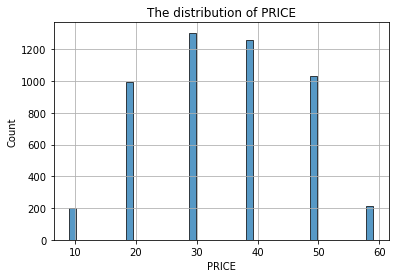

########## Summary Statistics of AGE ############
        count     mean        std   min   25%   50%   75%  100%   max
PRICE  5000.0  34.1320  12.464897   9.0  29.0  39.0  39.0  59.0  59.0
AGE    5000.0  23.5814   8.995908  15.0  17.0  21.0  27.0  66.0  66.0


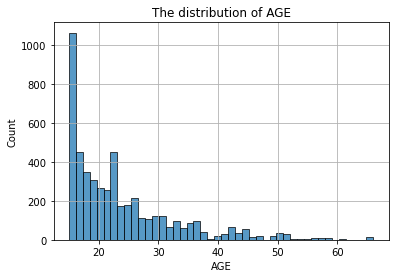

Unique Values of Source:
 2
Frequency of Source:
 android    2974
ios        2026
Name: SOURCE, dtype: int64
Unique Values of Price:
 6
Number of product sales by country:
 usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64
Total & average amount of sales by country:
              PRICE       
              mean    sum
COUNTRY                  
bra      34.327540  51354
can      33.608696   7730
deu      34.032967  15485
fra      33.587459  10177
tur      34.787140  15689
usa      34.007264  70225
Average amount of sales by source and country:
               mean           
             PRICE           
SOURCE     android        ios
COUNTRY                      
bra      34.387029  34.222222
can      33.330709  33.951456
deu      33.869888  34.268817
fra      34.312500  32.776224
tur      36.229437  33.272727
usa      33.760357  34.371703
  COUNTRY   SOURCE     SEX  AGE  PRICE
0     bra  android    male   46   59.0
1     usa  android    

'FRA_ANDROID_FEMALE_24_35'

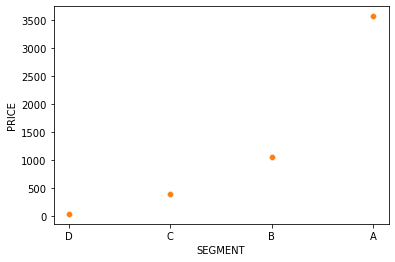

In [4]:
###############################################
# PROJECT : Potential Customer Return Calculation with Rule-Based Classification
# Main object: Recognizing a simple data and by performing certain data arrangements
#              calculating the potential return of mobile game market users

# A game company wants to create level-based new customer definitions (personas) by using some
# features ( Country, Source, Age, Sex) of its customers, and to create segments according to these new customer
# definitions and to estimate how much profit can be generated from  the new customers according to these segments.
###############################################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading persona.csv as pandas DataFrame
df = pd.read_csv(r"C:\Users\danie\Documents\persona.csv")


def check_df(dataframe):
    # Analyze descriptive statistics
    print(f"""
        ##################### Shape #####################\n\n\t{dataframe.shape}\n
        ##################### Types #####################\n\n{dataframe.dtypes}\n
        ##################### Head #####################\n\n{dataframe.head(3)}\n
        ##################### NA #####################\n\n{dataframe.isnull().sum()}\n
        ##################### Quantiles #####################\n\n{dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
        \n""")


check_df(df)


def num_summary(dataframe, plot=False):
    numerical_col = ['PRICE', 'AGE']
    quantiles = [0.25, 0.50, 0.75, 1]
    for col_name in numerical_col:
        print("########## Summary Statistics of " + col_name + " ############")
        print(dataframe[numerical_col].describe(quantiles).T)

        if plot:
            sns.histplot(data=dataframe, x=col_name)
            plt.xlabel(col_name)
            plt.title("The distribution of " + col_name)
            plt.grid(True)
            plt.show(block=True)


num_summary(df, plot=True)


def data_analysis(dataframe):
    # Data Analysis
    # Number of unique <SOURCE>
    print("Unique Values of Source:\n", dataframe["SOURCE"].nunique())
    print("Frequency of Source:\n", dataframe["SOURCE"].value_counts())

    # Number of unique <PRICE>
    print("Unique Values of Price:\n", dataframe["PRICE"].nunique())

    # Frequency of <COUNTRY>
    print("Number of product sales by country:\n", dataframe["COUNTRY"].value_counts())

    # Total & average amount of sales by country
    print("Total & average amount of sales by country:\n", dataframe.groupby("COUNTRY").agg({"PRICE": ["mean", "sum"]}))

    # Average amount of sales by source and country:
    print("Average amount of sales by source and country:\n", dataframe.pivot_table(values=['PRICE'],
                                                                                    index=['COUNTRY'],
                                                                                    columns=["SOURCE"],
                                                                                    aggfunc=["mean"]))


data_analysis(df)

# Average income on the basis of variables,

agg_df = df.groupby(["COUNTRY", 'SOURCE', "SEX", "AGE"])["PRICE"].mean().sort_values(ascending=False)

# Convert the index names to variable names

agg_df = agg_df.reset_index()
print(agg_df.head())

# Defining Personas

# Let's define new level-based customers (personas) by using Country, Source, Age and Sex.
# But, firstly we need to convert age variable to categorical data.


def define_persona(dataframe):
    # Let's define new level-based customers (personas) by using Country, Source, Age and Sex.
    # But, firstly we need to convert age variable to categorical data.

    bins = [dataframe["AGE"].min(), 18, 23, 35, 45, dataframe["AGE"].max()]
    labels = [str(dataframe["AGE"].min()) + '_18', '19_23', '24_35', '36_45', '46_' + str(dataframe["AGE"].max())]

    dataframe["AGE_CAT"] = pd.cut(dataframe["AGE"], bins, labels=labels)
    dataframe.groupby("AGE_CAT").agg({"AGE": ["min", "max", "count"]})

    # For creating personas, we group all the features in the dataset:
    df_summary = dataframe.groupby(["COUNTRY", "SOURCE", "SEX", "AGE_CAT"])[["PRICE"]].sum().reset_index()
    df_summary["CUSTOMERS_LEVEL_BASED"] = pd.DataFrame(["_".join(row).upper() for row in df_summary.values[:, 0:4]])

    # Calculating average amount of personas:
    df_persona = df_summary.groupby("CUSTOMERS_LEVEL_BASED").agg({"PRICE": "mean"})
    df_persona = df_persona.reset_index()

    return df_persona


define_persona(df)


# Creating Segments based on Personas

def create_segments(dataframe):
    # When we list the price in descending order, we want to express the best segment as the A segment and to define 4 segments.

    df_persona = define_persona(dataframe)

    segment_labels = ["D", "C", "B", "A"]
    df_persona["SEGMENT"] = pd.qcut(df_persona["PRICE"], 4, labels=segment_labels)
    df_segment = df_persona.groupby("SEGMENT").agg({"PRICE": "mean"})

    # Demonstrating segments as bars on a chart, where the length of each bar varies based on the value of the customer profile
    plot = sns.scatterplot(x="SEGMENT", y="PRICE", data=df_segment)
    for scatter in plot.patches:
        plot.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2,
                       bar.get_height()), ha='center', va='center',
                      size=8, xytext=(0, 8),
                      textcoords='offset points')
    return df_persona


create_segments(df)

# Prediction



def ruled_based_classification(dataframe):
    df_segment = create_segments(dataframe)

    def age_cat(age):
        if age <= 18:
            age_cat = "15_18"
            return age_cat
        elif (age > 18) and (age <= 23):
            age_cat = "19_23"
            return age_cat
        elif (age > 23) and (age <= 35):
            age_cat = "24_35"
            return age_cat
        elif (age > 35) and (age <= 45):
            age_cat = "36_45"
            return age_cat
        elif (age > 45) and (age <= 66):
            age_cat = "46_66"
            return age_cat

    country = input("Enter a country name (USA/EUR/BRA/DEU/TUR/FRA):")
    source = input("Enter the operating system of phone (IOS/ANDROID):")
    sex = input("Enter the gender (FEMALE/MALE):")
    age = int(input("Enter the age:"))
    age_seg = age_cat(age)
    new_user = country.upper() + '_' + source.upper() + '_' + sex.upper() + '_' + age_seg

    print(new_user)
    print("Segment:" + df_segment[df_segment["CUSTOMERS_LEVEL_BASED"] == new_user].loc[:, "SEGMENT"].values[0])
    print("Price:" + str(df_segment[df_segment["CUSTOMERS_LEVEL_BASED"] == new_user].loc[:, "PRICE"].values[0]))

    return new_user


ruled_based_classification(df)